In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 10]
os.chdir("C:/Users/Admin/Downloads")

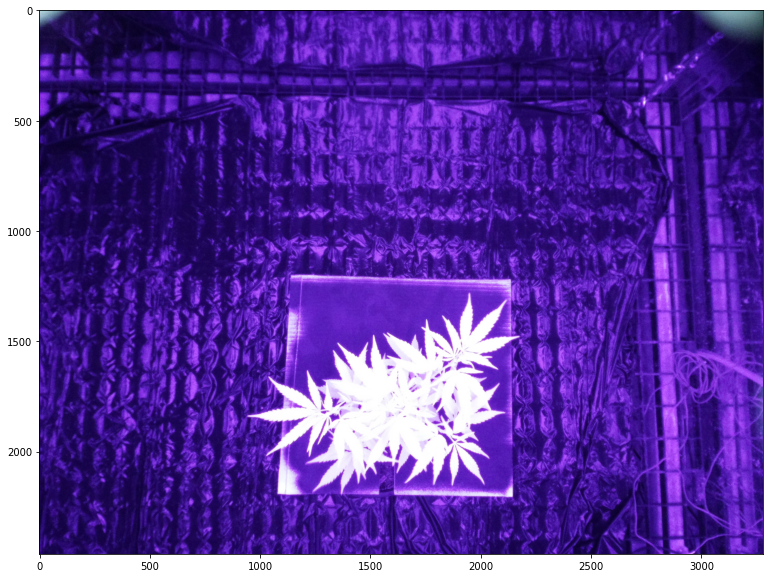

In [2]:
pyplot.imshow(cv.imread("2-10-2022 18 0.png"))

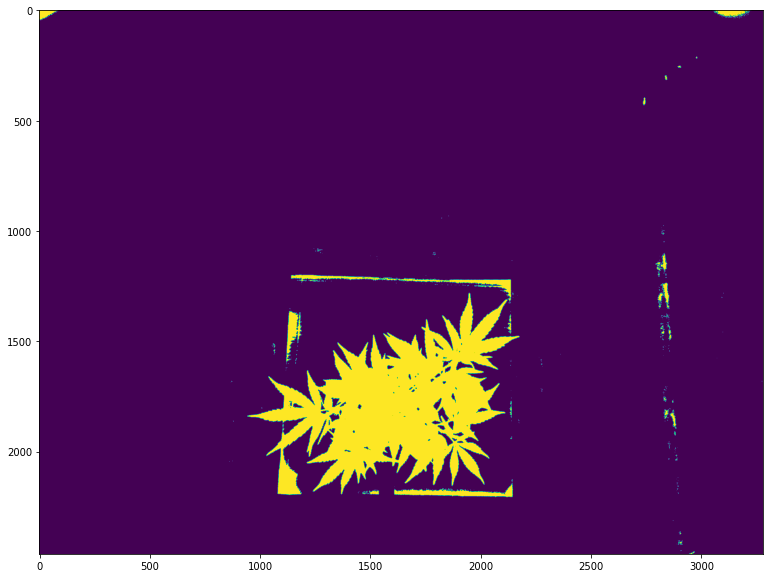

In [4]:
image = cv.threshold(cv.cvtColor(cv.imread("2-10-2022 18 0.png"), cv.COLOR_RGB2GRAY), 0, 1, cv.THRESH_OTSU)[1]
pyplot.imshow(image)

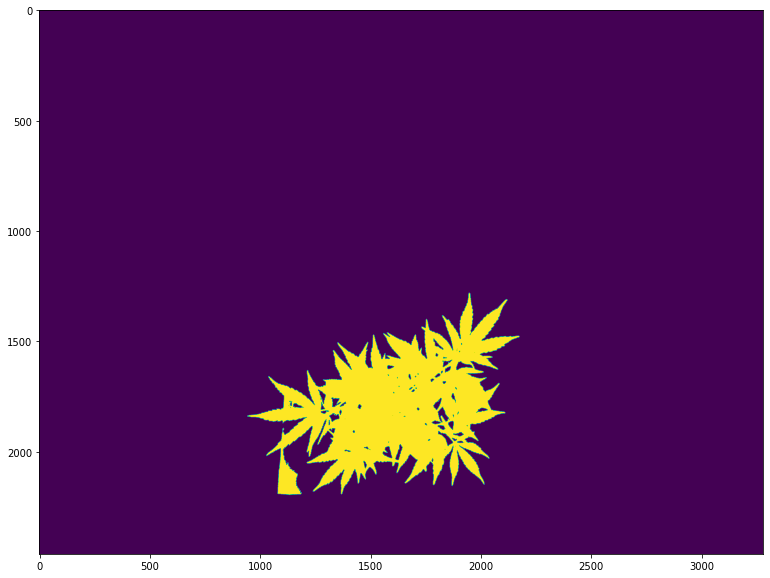

In [5]:
(_, elementLabels, elementStats, centroids) = cv.connectedComponentsWithStats(image, 8)
elementLabels = elementLabels[1:]
elementStats = elementStats[1:]
biggestElementLocation = np.where(elementStats[1:, 4] == max(elementStats[1:, 4]))[0][0] + 2
elementLabels[elementLabels != biggestElementLocation] = 0
interestingPixels = np.sum(elementLabels != 0)
pyplot.imshow(elementLabels)

In [6]:
interestingPixels

469365

In [7]:
elementLabels = elementLabels.astype(np.uint8)
contours, _ = cv.findContours(elementLabels, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
contours = contours[0]
centroid = centroids[biggestElementLocation]
contours = [np.sqrt(np.sum(np.square(c - centroid))) for c in contours]
descriptors = np.fft.fft(contours)[0:64]
magnitude = descriptors.real
phase = descriptors.imag